In [1]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.models import model_from_json

/home/ranojoy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
current_location = os.getcwd()
data_location = "data/"

In [3]:
fopen = open(data_location + "pattern.txt", "r")
patterns = fopen.read()
fopen.close()

In [4]:
patterns = patterns.split("\n")
patterns = patterns[:len(patterns) - 1]

In [5]:
patterns_final = []
for k in range(len(patterns)):
    if len(patterns[k]) == 10:
        patterns_final.append(patterns[k].upper())
        
print ("Given patterns :", len(patterns_final))

Given patterns : 82


In [6]:
data_prep = []
for k in range(len(patterns_final)):
    one = []
    for m in range(len(patterns_final[k])):
        one.append(ord(patterns_final[k][m]) - ord('A') + 1)
    data_prep.append(one)

In [8]:
print (data_prep[9], patterns_final[9])

[1, 2, 3, 3, 1, 2, 2, 3, 1, 2] ABCCABBCAB


In [9]:
input_ = []
target_ = []

input_size = 5
dimension = 4

for k in range(len(data_prep)):
    one = []
    two = []
    for m in range(10 - input_size):
        one.append(data_prep[k][m:input_size + m])
        two.append(data_prep[k][input_size + m])
    
    three = []
    six = []
    for p in range(len(one) + 1 - dimension):
        four = []
        five = []
        for l in range(dimension):
            four.append(one[p + l])
            five.append(two[p + l])
        three.append(four)
        six.append(five)
    
    for b in range(len(three)):
        input_.append(three[b])
        target_.append(six[b])

In [10]:
print (len(input_))
print (input_[0])
print (len(target_))
print (target_[0])

164
[[1, 3, 2, 2, 3], [3, 2, 2, 3, 3], [2, 2, 3, 3, 1], [2, 3, 3, 1, 2]]
164
[3, 1, 2, 3]


In [11]:
target = []

for k in range(len(target_)):
    a = [0] * 3
    a[target_[k][len(target_[k]) - 1] - 1] = 1
    target.append(a)

In [12]:
print (target[0])

[0, 0, 1]


In [13]:
trainX = input_[:int(len(input_) * 0.6)]
trainY = target[:int(len(target) * 0.6)]

validateX = input_[int(len(input_) * 0.6) : int(len(input_) * 0.8)]
validateY = target[int(len(target) * 0.6) : int(len(target) * 0.8)]

testX = input_[int(len(input_) * 0.8):]
testY = target[int(len(target) * 0.8):]

trainX = np.array(trainX)
trainY = np.array(trainY)
validateX = np.array(validateX)
validateY = np.array(validateY)
testX = np.array(testX)
testY = np.array(testY)

In [14]:
print (trainX[0], trainY[0], input_[0])
print (len(trainX[0]))

[[1 3 2 2 3]
 [3 2 2 3 3]
 [2 2 3 3 1]
 [2 3 3 1 2]] [0 0 1] [[1, 3, 2, 2, 3], [3, 2, 2, 3, 3], [2, 2, 3, 3, 1], [2, 3, 3, 1, 2]]
4


In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(200, return_sequences = True, input_shape=(dimension, len(trainX[0][0])), recurrent_dropout = 0.2, dropout = 0.2))
model.add(LSTM(200, return_sequences = False, recurrent_dropout = 0.2, dropout = 0.2))
model.add(Dense(3, activation = "softmax"))

In [16]:
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(trainX, trainY, epochs=100, batch_size=1000, verbose=1, validation_data = (validateX, validateY), shuffle=True)

Train on 98 samples, validate on 33 samples
Epoch 1/100
98/98 [==============================] - 11s 117ms/step - loss: 1.0997 - acc: 0.3673 - val_loss: 1.1026 - val_acc: 0.3636
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 1.1023 - acc: 0.3776 - val_loss: 1.1028 - val_acc: 0.3636
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 1.0991 - acc: 0.3878 - val_loss: 1.0968 - val_acc: 0.3636
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 1.0899 - acc: 0.3878 - val_loss: 1.0931 - val_acc: 0.3636
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 1.0874 - acc: 0.3776 - val_loss: 1.0916 - val_acc: 0.3636
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 1.0880 - acc: 0.3878 - val_loss: 1.0907 - val_acc: 0.3636
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 1.0942 - acc: 0.3776 - val_loss: 1.0901 - val_acc: 0.3636
Epoch 8/100
98/98 [=================

Epoch 63/100
98/98 [==============================] - 0s 3ms/step - loss: 0.9437 - acc: 0.5204 - val_loss: 1.0408 - val_acc: 0.6061
Epoch 64/100
98/98 [==============================] - 0s 4ms/step - loss: 0.8902 - acc: 0.5816 - val_loss: 1.0038 - val_acc: 0.6061
Epoch 65/100
98/98 [==============================] - 0s 3ms/step - loss: 0.9365 - acc: 0.5510 - val_loss: 1.0173 - val_acc: 0.6061
Epoch 66/100
98/98 [==============================] - 0s 3ms/step - loss: 0.9292 - acc: 0.5510 - val_loss: 1.0452 - val_acc: 0.6061
Epoch 67/100
98/98 [==============================] - 0s 3ms/step - loss: 0.9026 - acc: 0.5816 - val_loss: 1.0432 - val_acc: 0.6061
Epoch 68/100
98/98 [==============================] - 0s 3ms/step - loss: 0.9305 - acc: 0.5612 - val_loss: 1.0473 - val_acc: 0.6061
Epoch 69/100
98/98 [==============================] - 0s 3ms/step - loss: 0.9149 - acc: 0.5510 - val_loss: 1.0339 - val_acc: 0.6061
Epoch 70/100
98/98 [==============================] - 0s 3ms/step - loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


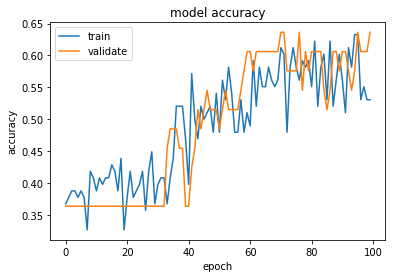

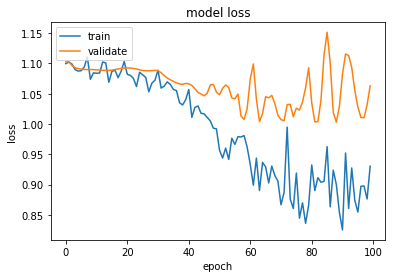

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [20]:
scores_train = model.evaluate(trainX, trainY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(validateX, validateY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(testX, testY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

98/98 [==============================] - 0s 1ms/step
Train acc: 62.24%
33/33 [==============================] - 0s 2ms/step
Train acc: 63.64%
33/33 [==============================] - 0s 1ms/step
Train acc: 48.48%


In [21]:
predictions = model.predict(testX)
for k in range(len(testX)):
    a = [0]*3
    maxx = max(predictions[k])
    pos = 0
    for m in range(len(predictions[k])):
        if predictions[k][m] == maxx:
            pos = m
            break
    a[pos] = 1
    #print (predictions[k], " : ",  a, " : ",testY[k])
    print (a, " : ", list(testY[k]))

[0, 1, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[1, 0, 0]  :  [1, 0, 0]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]


In [22]:
model_json = model.to_json()
with open("model_lstm/model_9th.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_lstm/model_9th.h5")
print("Saved model to disk")

Saved model to disk
